# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees, overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scikitplot as skplt

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

#Importing Classification Models 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score



#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [3]:
#Loading Dataset
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print("Shape of the Dataset is ",df.shape)

Shape of the Dataset is  (1470, 35)


# Exploratory Data Analysis

In [6]:
#Checking Datatypes of features and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have 26 numeric features and 8 categorical features. Our target variable "Attrition" is categorical.

In [7]:
#Checking Null Values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

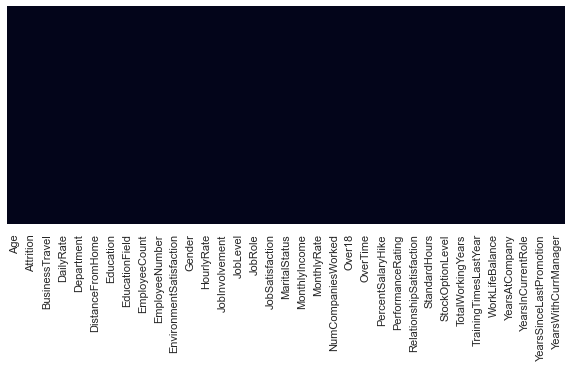

In [8]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='rocket')

In [9]:
#Checking for Duplicated Records or fields
df.duplicated().sum()

0

In [10]:
#Statistical Overview of our Numerical Features
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Univariate Analysis

<AxesSubplot:ylabel='None'>

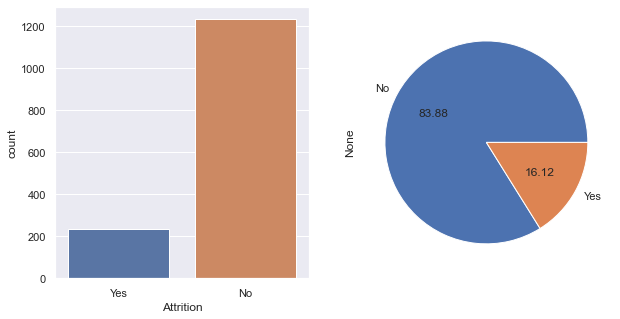

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Attrition'], ax = ax[0])
df.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

There seems to be a class Imbalance in our Target Variable. Ratio of 83.88% : 16.12%

<AxesSubplot:ylabel='None'>

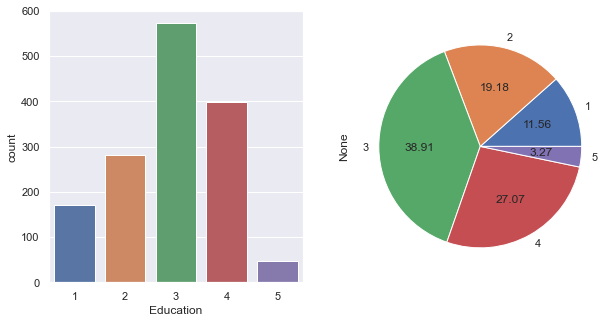

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Education'], ax = ax[0])
df.groupby('Education').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

There are 5 categories in Education and 3 is the most common Education background for employees with 38.91%.

<AxesSubplot:ylabel='None'>

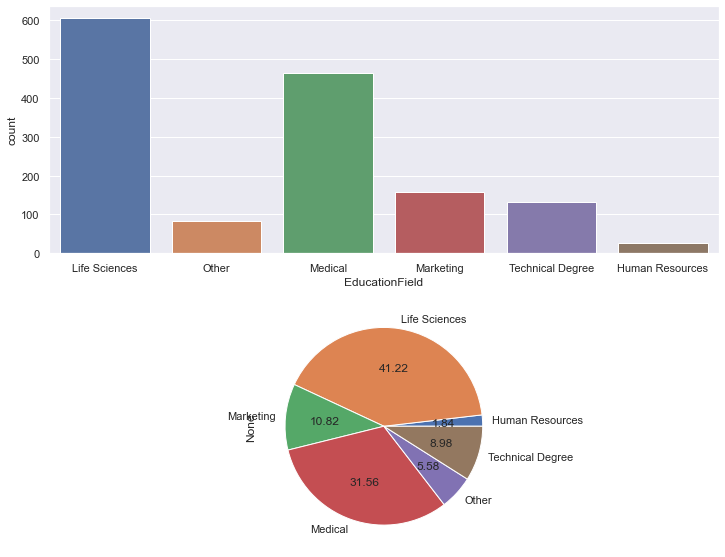

In [13]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

sns.countplot(df['EducationField'], ax = ax[0])
df.groupby('EducationField').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

Life Sciences is the most common EducationField with 41.22% employees. Human Resources is the least common with only 1.84% employees.

<AxesSubplot:ylabel='None'>

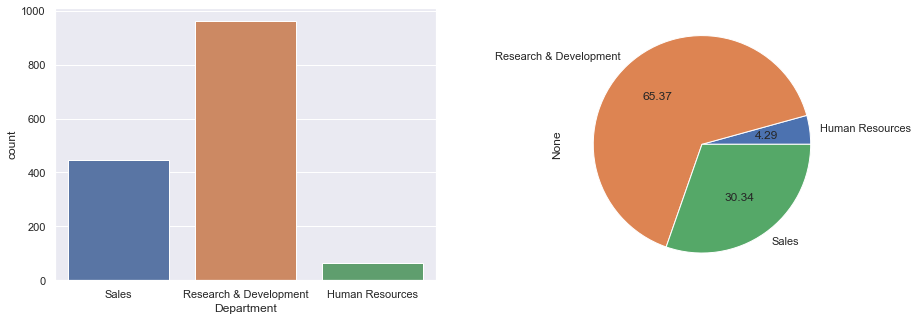

In [14]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(df['Department'], ax = ax[0])
df.groupby('Department').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

We've 3 Departments in total. Research & Development Department consists of majority of employees wiht 65.37%.

<AxesSubplot:ylabel='None'>

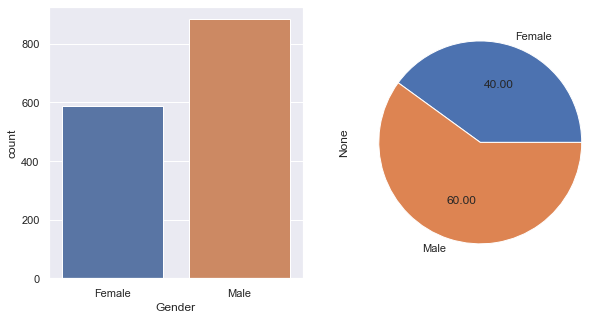

In [15]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Gender'], ax = ax[0])
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

We've 3:2 ratio of Men and Women employees.

<AxesSubplot:ylabel='None'>

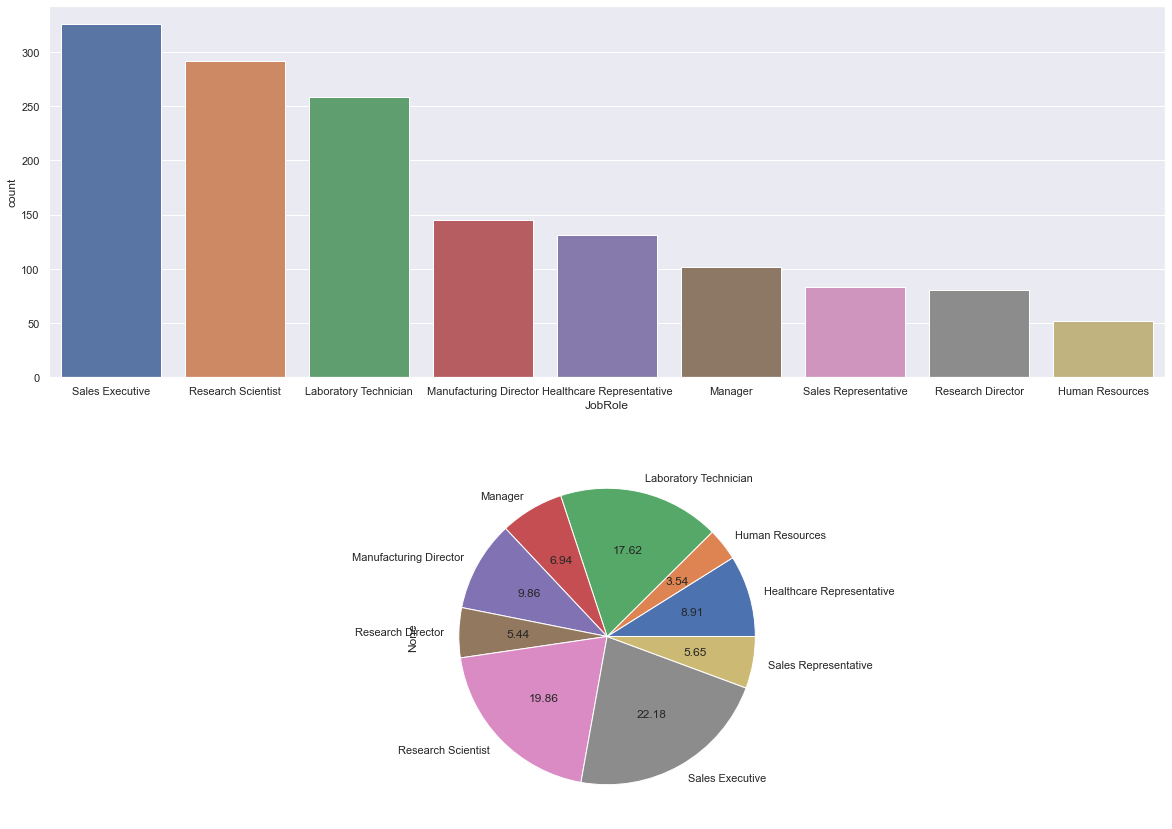

In [16]:
fig, ax = plt.subplots(2,1, figsize = (20,15))

sns.countplot(df['JobRole'], ax = ax[0])
df.groupby('JobRole').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

We've 9 JobRoles categories out of which Sales Executive have majority employees 22.18% and HR have least employees i.e. 3.54%.

<AxesSubplot:ylabel='None'>

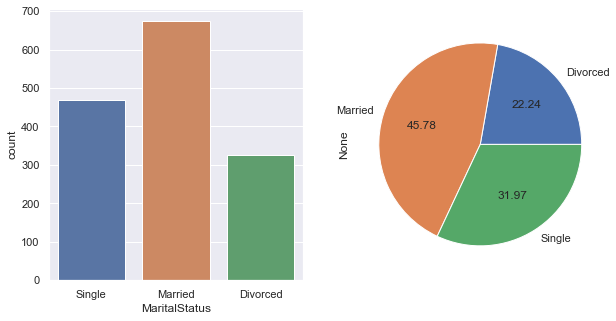

In [17]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['MaritalStatus'], ax = ax[0])
df.groupby('MaritalStatus').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

Almost half of total employees are married with 45.78%.

<AxesSubplot:ylabel='None'>

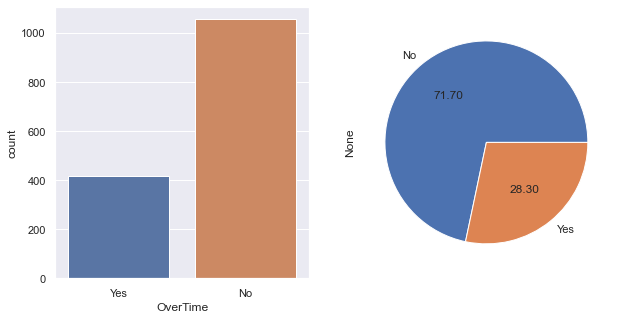

In [19]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['OverTime'], ax = ax[0])
df.groupby('OverTime').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

only 28.30% of employees do overtime.

<AxesSubplot:ylabel='None'>

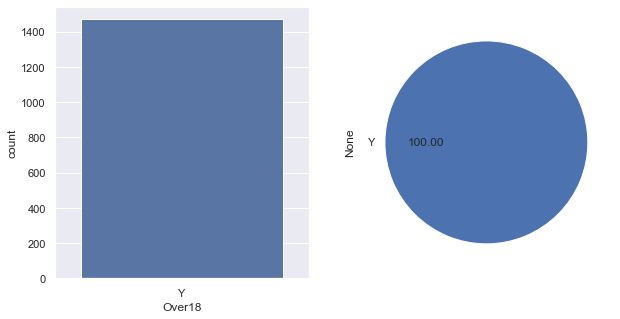

In [20]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Over18'], ax =ax[0])
df.groupby('Over18').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

All employees are over 18 so this Feature won't help us in our Prediction so it's better to drop it.

Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='DailyRate'>

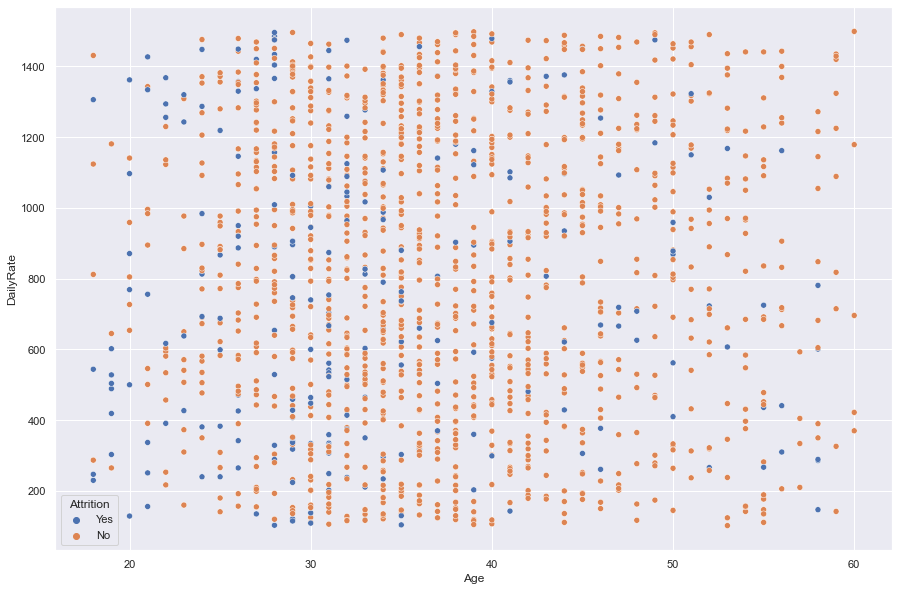

In [21]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x  = 'Age', y = 'DailyRate' , hue = 'Attrition')

Between age 20-40 the attrition is high.

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

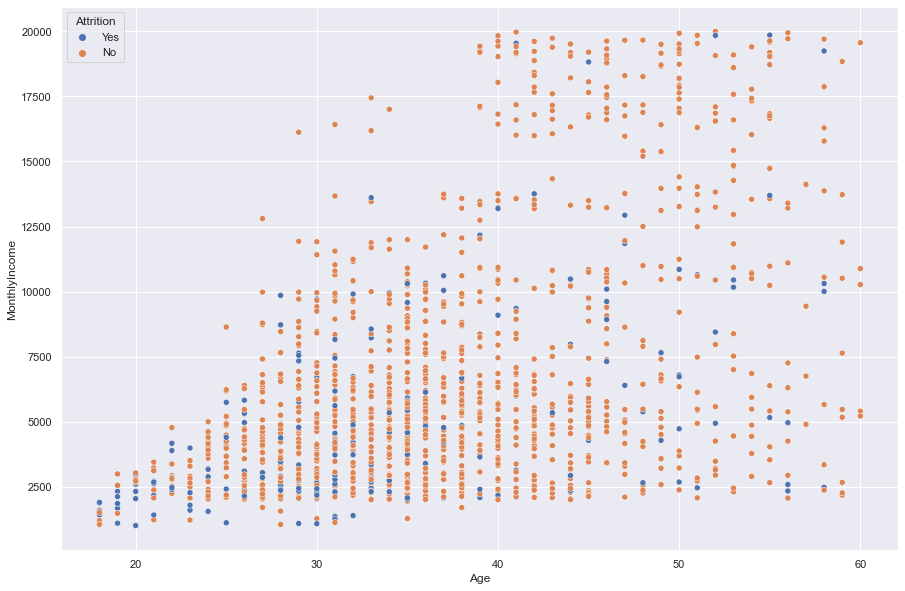

In [22]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x  = 'Age', y = 'MonthlyIncome' , hue = 'Attrition')

Between 2500-12500 MonthlyIncome Attrition is high.

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

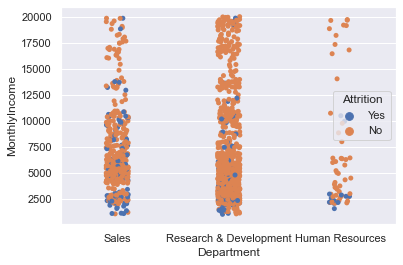

In [23]:
sns.stripplot(data = df, x  = 'Department', y = 'MonthlyIncome' , hue = 'Attrition')

Sales Department have most Attrition.

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

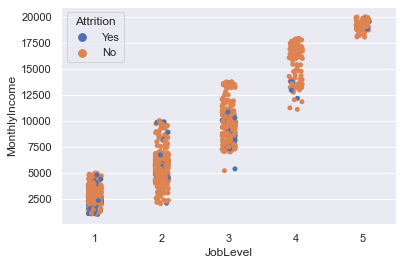

In [24]:
sns.stripplot(data = df, x  = 'JobLevel', y = 'MonthlyIncome' , hue = 'Attrition')

JobLevel 1 have most Attrition.

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

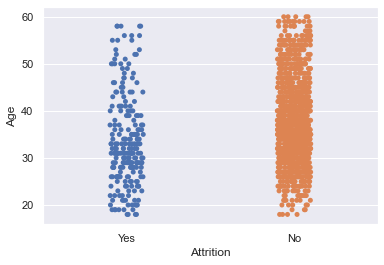

In [25]:
sns.stripplot(data = df, x  = 'Attrition', y = 'Age')

Attrition is high between 20-40 Age.

Multivariate Analysis

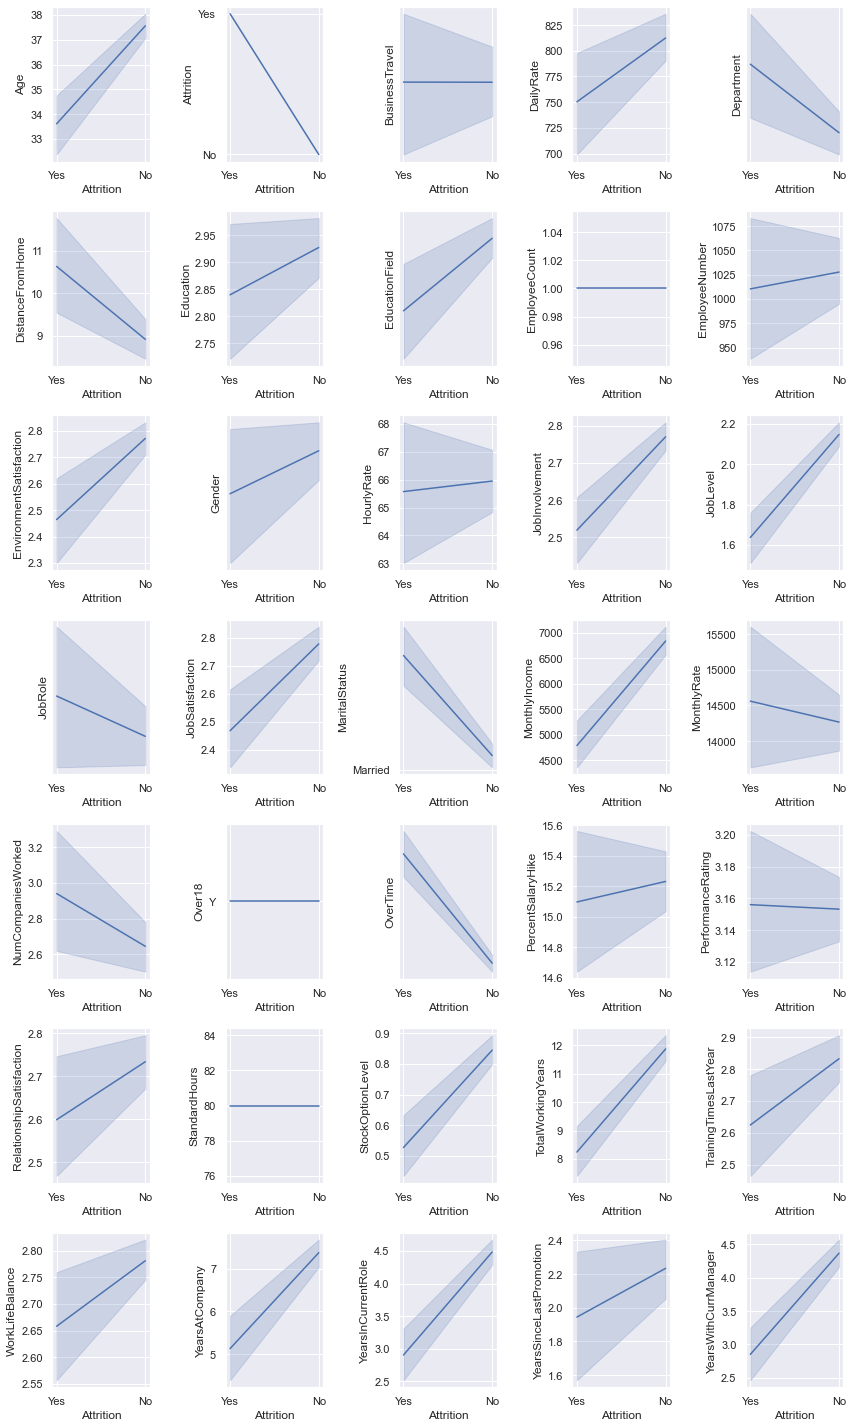

In [26]:
#Analysing relationship between features and target
plt.figure(figsize = (12,20), facecolor ='white')
plotnumber=1

for column in df:
    if plotnumber<=36: 
        ax = plt.subplot(7,5,plotnumber,)
        sns.lineplot(data = df, x = 'Attrition', y = column)
    plotnumber+=1
plt.tight_layout()

- StandardHour, over18, EmployeeNumber and EmployeeCount have no impact on Attrition.
- BusinessTravel have almost no impact on Attrition.

Data Cleaning

In [27]:
#Dropping Unnecessary Columns
df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'],axis = 1,inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Removing Skewness

In [28]:
#Analysing skewness in our Dataset
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
DistanceFromHome             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Education                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
HourlyRate                     AxesSubplot(0.125,0.677439;0.133621x0.0920732)
JobInvolvement              AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
JobLevel                     AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
JobSatisfaction             AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
MonthlyIncome               AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
MonthlyRate                    AxesSubplot(0.125,0.566951;0.133621x0.0920732)
NumCompaniesWorked          AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
PercentSalaryHike            AxesSubplot(0.44569,0.566951;0.1336

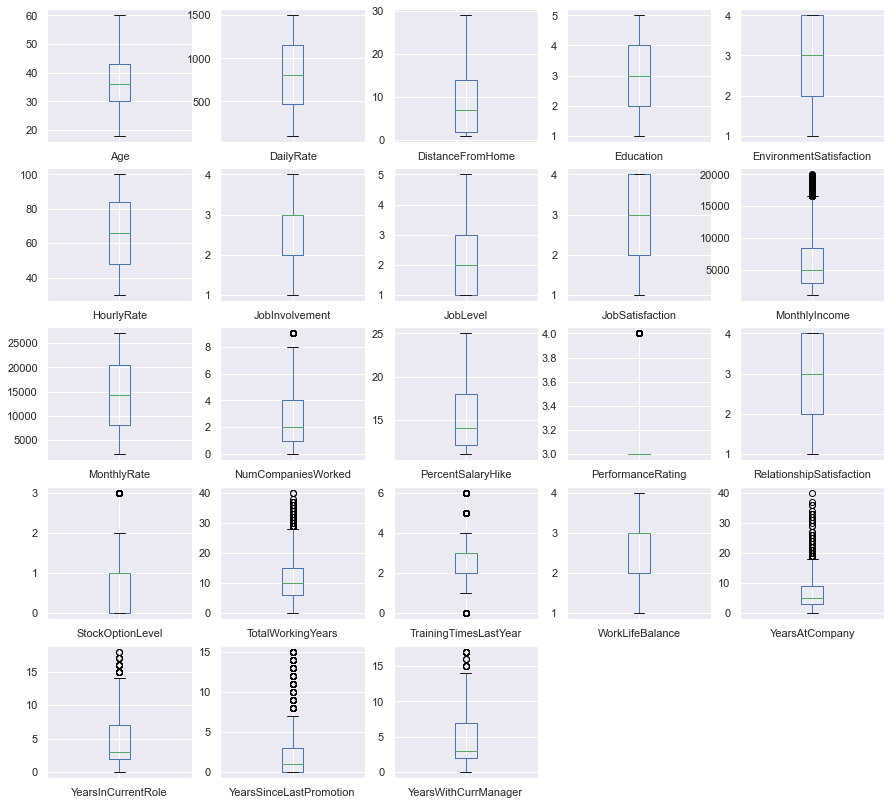

In [29]:
#Multivariate Analysis
#Visualising Skewness
df.plot(kind ='box', subplots = True, layout = (7,5), figsize = (15,20))

Removing Skewness using Logarithmic Transformation

In [30]:
df['DistanceFromHome'] = np.log(df['DistanceFromHome'])
df['JobLevel'] = np.log(df['JobLevel'])
df['MonthlyIncome'] = np.log(df['MonthlyIncome'])
df['PercentSalaryHike'] = np.log(df['PercentSalaryHike'])

Removing Skewness using SquareRoot and CubeRoot Transformation

In [31]:
df['NumCompaniesWorked'] = np.sqrt(df['NumCompaniesWorked'])
df['StockOptionLevel'] = np.sqrt(df['StockOptionLevel'])
df['TotalWorkingYears'] = np.sqrt(df['TotalWorkingYears'])
df['YearsAtCompany'] = np.sqrt(df['YearsAtCompany'])
df['YearsInCurrentRole'] = np.sqrt(df['YearsInCurrentRole'])
df['YearsWithCurrManager'] = np.sqrt(df['YearsWithCurrManager'])
df['PerformanceRating'] = np.cbrt(df['PerformanceRating'])
df['YearsSinceLastPromotion'] = np.cbrt(df['YearsSinceLastPromotion'])

In [32]:
#Analysing Skewness After Removal
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.246004
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.219763
JobSatisfaction            -0.329672
MonthlyIncome               0.286192
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
PercentSalaryHike           0.494566
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.057528
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              0.426835
YearsInCurrentRole         -0.254344
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -0.254611
dtype: float64

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
DistanceFromHome             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Education                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
HourlyRate                     AxesSubplot(0.125,0.677439;0.133621x0.0920732)
JobInvolvement              AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
JobLevel                     AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
JobSatisfaction             AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
MonthlyIncome               AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
MonthlyRate                    AxesSubplot(0.125,0.566951;0.133621x0.0920732)
NumCompaniesWorked          AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
PercentSalaryHike            AxesSubplot(0.44569,0.566951;0.1336

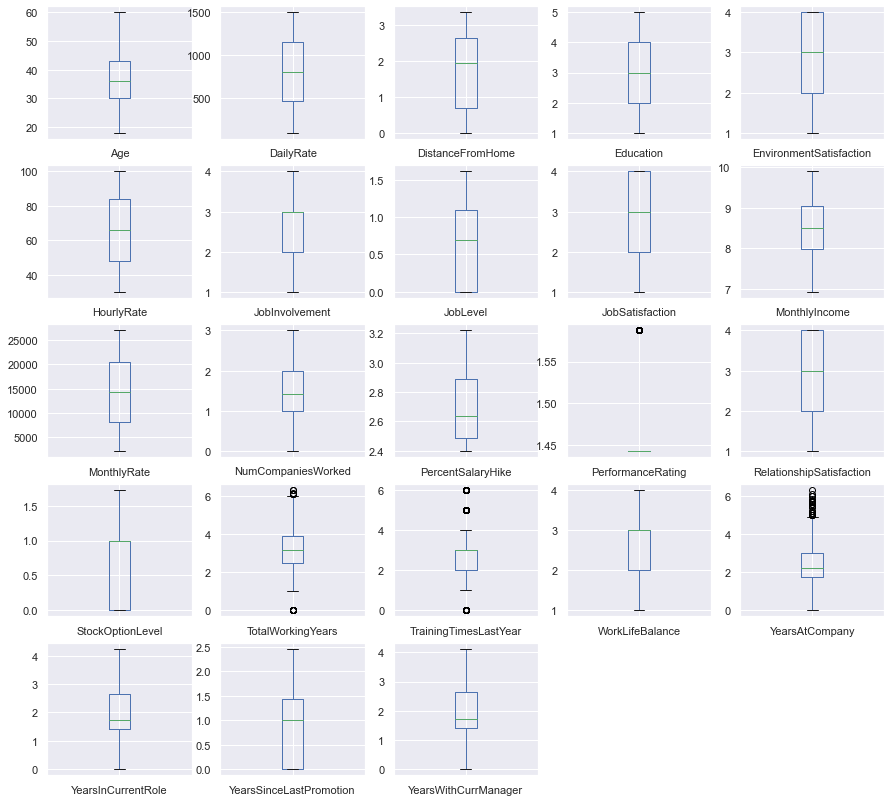

In [33]:
#Visualising Skewness after Removal
df.plot(kind ='box', subplots = True, layout = (7,5), figsize = (15,20))

Encoding Categorical features

In [34]:
#Defining all the categorical values in features
enc = OrdinalEncoder(categories = [['Travel_Rarely','Travel_Frequently','Non-Travel'],['Research & Development','Sales','Human Resources'],
                                   ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources'],['Male','Female'],
                                  ['Sales Executive','Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative',
                                  'Manager','Sales Representative','Research Director','Human Resources'],['Married','Single','Divorced'],['Yes','No']])

In [35]:
#encoding all the categories in features
X_new = enc.fit_transform(df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']])
X_new = pd.DataFrame(X_new, columns = [['BusinessTravel_new','Department_new','EducationField_new','Gender_new','JobRole_new','MaritalStatus_new','OverTime_new']])
X_new

,BusinessTravel_new,Department_new,EducationField_new,Gender_new,JobRole_new,MaritalStatus_new,OverTime_new
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,4.0,0.0,2.0,1.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...
1465,1.0,0.0,1.0,0.0,2.0,0.0,1.0
1466,0.0,0.0,1.0,0.0,4.0,0.0,1.0
1467,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1468,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [36]:
#Concatenating old df with new df with encoded features 
df1 = pd.concat([df,X_new], axis = 1)
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,"(BusinessTravel_new,)","(Department_new,)","(EducationField_new,)","(Gender_new,)","(JobRole_new,)","(MaritalStatus_new,)","(OverTime_new,)"
0,41,Yes,Travel_Rarely,1102,Sales,0.000000,2,Life Sciences,2,Female,...,2.000000,0.000000,2.236068,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,49,No,Travel_Frequently,279,Research & Development,2.079442,1,Life Sciences,3,Male,...,2.645751,1.000000,2.645751,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,37,Yes,Travel_Rarely,1373,Research & Development,0.693147,2,Other,4,Male,...,0.000000,0.000000,0.000000,0.0,0.0,4.0,0.0,2.0,1.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,1.098612,4,Life Sciences,4,Female,...,2.645751,1.442250,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,0.693147,1,Medical,1,Male,...,1.414214,1.259921,1.414214,0.0,0.0,1.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,3.135494,2,Medical,3,Male,...,1.414214,0.000000,1.732051,1.0,0.0,1.0,0.0,2.0,0.0,1.0
1466,39,No,Travel_Rarely,613,Research & Development,1.791759,1,Medical,4,Male,...,2.645751,1.000000,2.645751,0.0,0.0,1.0,0.0,4.0,0.0,1.0
1467,27,No,Travel_Rarely,155,Research & Development,1.386294,3,Life Sciences,2,Male,...,1.414214,0.000000,1.732051,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1468,49,No,Travel_Frequently,1023,Sales,0.693147,3,Medical,4,Male,...,2.449490,0.000000,2.828427,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [37]:
#Dropping categorical features
df1.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],inplace = True)

In [38]:
#checking for discrepancies after encoding
df1.isna().sum()

Age                         0
Attrition                   0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
(BusinessTravel_new,)       0
(Department_new,)           0
(EducationField_new,)       0
(Gender_new,)               0
(JobRole_new,)              0
(MaritalStatus_new,)        0
(OverTime_new,)             0
dtype: int64

In [39]:
#Checking our target variable category counts
df1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [40]:
#Encoding our Target variable
df1['Attrition'].replace({'Yes' : 1, 'No' : 0},inplace = True)

In [41]:
#Splitting Dataset into Predictors and Label
X = df1.drop('Attrition',axis =1)
y = df1['Attrition']

Handling Class imbalance using SMOTE

In [42]:
#instantiating and fitting Smote
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X,y)

In [43]:
#print Count of class before oversampling and after oversampling
print('Before SMOTE : ',Counter(y))
print('After SMOTE : ',Counter(y_smote))

Before SMOTE :  Counter({0: 1233, 1: 237})
After SMOTE :  Counter({1: 1233, 0: 1233})


Text(0.5, 1.0, 'After using Smote')

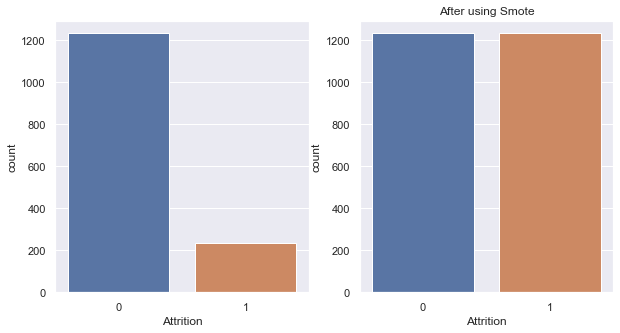

In [44]:
#Visualising class imbalance and after using smote

fig, ax = plt.subplots(1,2, figsize = (10,5),)

sns.countplot(y, ax =ax [0])
plt.title("Before using Smote")

sns.countplot(y_smote, ax =ax[1])
plt.title("After using Smote")

In [45]:
print("Shape of the Dataset before using SMOTE for Oversampling :",X.shape)
print("Shape of the Dataset after using SMOTE for Oversampling :",X_smote.shape)

Shape of the Dataset before using SMOTE for Oversampling : (1470, 30)
Shape of the Dataset after using SMOTE for Oversampling : (2466, 30)


Model Building

In [46]:
#Splitting Dataset into training and testing data using train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size = 0.25)

Logistic Regression

In [47]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.8379254457050244 on random_state 173


In [48]:
#model instantiating and fitting
LR = LogisticRegression(random_state = 90)
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
acc = accuracy_score(y_test,predlr)
acc

0.8152350081037277

In [49]:
# Performing Evaluation metrics for our model
predlr=LR.predict(x_test)
print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlr),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predlr), '\n')
print('Classification Logistic Regression : \n',classification_report(y_test,predlr))

Accuracy Score for Logistic Regression is : 81.52000000000001 % 

Confusion Matrix of Logistic Regression : 
 [[251  61]
 [ 53 252]] 

Classification Logistic Regression : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       312
           1       0.81      0.83      0.82       305

    accuracy                           0.82       617
   macro avg       0.82      0.82      0.82       617
weighted avg       0.82      0.82      0.82       617



array([[251,  61],
       [ 53, 252]], dtype=int64)

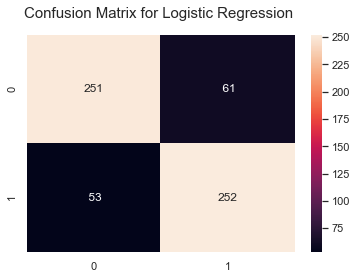

In [50]:
cm = confusion_matrix(y_test,predlr)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predlr),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Logistic Regression ', y=1.05, size=15)
cm

Decision Tree Classifier

In [51]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
DT.score(x_test,y_test)

0.8476499189627229

In [53]:
# Performing Evaluation metrics for our model
preddt=DT.predict(x_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 84.76 % 

Confusion Matrix of Decision Tree: 
 [[255  57]
 [ 37 268]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       312
           1       0.82      0.88      0.85       305

    accuracy                           0.85       617
   macro avg       0.85      0.85      0.85       617
weighted avg       0.85      0.85      0.85       617



array([[255,  57],
       [ 37, 268]], dtype=int64)

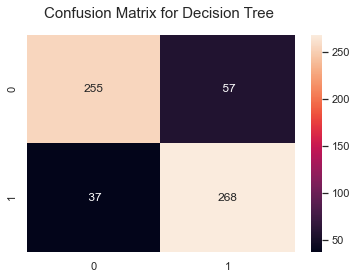

In [54]:
cm = confusion_matrix(y_test,preddt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,preddt),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Decision Tree ', y=1.05, size=15)
cm

K Nearest Neighbors

In [55]:
#Instantiating KnN model and training it
knn = KNeighborsClassifier() 
knn.fit(x_train, y_train)  
Y_pred = knn.predict(x_test)  
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

81.45

In [56]:
# Performing Evaluation metrics for our model
knnpred=knn.predict(x_test)
print('Accuracy Score for KNN is :',round(accuracy_score(y_test,knnpred),4)*100,'% \n')
print('Confusion Matrix of KNN: \n',confusion_matrix(y_test,knnpred), '\n')
print('Classification KNN: \n',classification_report(y_test,knnpred))

Accuracy Score for KNN is : 71.15 % 

Confusion Matrix of KNN: 
 [[192 120]
 [ 58 247]] 

Classification KNN: 
               precision    recall  f1-score   support

           0       0.77      0.62      0.68       312
           1       0.67      0.81      0.74       305

    accuracy                           0.71       617
   macro avg       0.72      0.71      0.71       617
weighted avg       0.72      0.71      0.71       617



array([[192, 120],
       [ 58, 247]], dtype=int64)

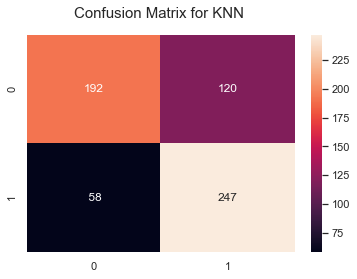

In [57]:
cm = confusion_matrix(y_test,knnpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for KNN ', y=1.05, size=15)
cm

Random Forest Classifier

In [59]:
#Model instantiating and training it
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
RF.score(x_test,y_test)

0.940032414910859

In [61]:
# Performing Evaluation metrics for our model
predrf=RF.predict(x_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 94.0 % 

Confusion Matrix of Random Forest Classifier : 
 [[306   6]
 [ 31 274]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       312
           1       0.98      0.90      0.94       305

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617



array([[306,   6],
       [ 31, 274]], dtype=int64)

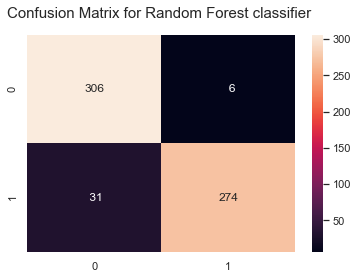

In [62]:
cm = confusion_matrix(y_test,predrf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predrf),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

Adaboost Classifier

In [63]:
#Instantiating model and fitting model

adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [64]:
# Performing Evaluation metrics for our model
predada=adaboost.predict(x_test)
print('Accuracy Score for AdaBoost is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of AdaBoost : \n',confusion_matrix(y_test,predada), '\n')
print('Classification AdaBoost : \n',classification_report(y_test,predada))

Accuracy Score for AdaBoost is : 92.86999999999999 % 

Confusion Matrix of AdaBoost : 
 [[290  22]
 [ 22 283]] 

Classification AdaBoost : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       312
           1       0.93      0.93      0.93       305

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



array([[290,  22],
       [ 22, 283]], dtype=int64)

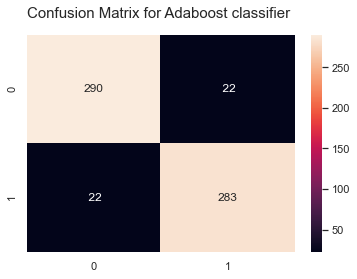

In [65]:
cm = confusion_matrix(y_test,predada)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predada),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Adaboost classifier ', y=1.05, size=15)
cm

Bagging Classifier

In [66]:
#Instantiating model and fitting model

BG = BaggingClassifier()
BG.fit(x_train,y_train)

BaggingClassifier()

In [67]:
BG.score(x_test,y_test)

0.8978930307941653

In [68]:
# Performing Evaluation metrics for our model
predbg=BG.predict(x_test)
print('Accuracy Score for Bagging Classifier is :',round(accuracy_score(y_test,predbg),4)*100,'% \n')
print('Confusion Matrix of Bagging Classifier is : \n',confusion_matrix(y_test,predbg), '\n')
print('Classification  for Bagging Classifier : \n',classification_report(y_test,predbg))

Accuracy Score for Bagging Classifier is : 89.79 % 

Confusion Matrix of Bagging Classifier is : 
 [[294  18]
 [ 45 260]] 

Classification  for Bagging Classifier : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       312
           1       0.94      0.85      0.89       305

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617



array([[294,  18],
       [ 45, 260]], dtype=int64)

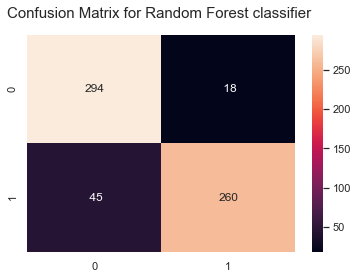

In [70]:
cm = confusion_matrix(y_test,predbg)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predbg),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

Printing cross_val_scores of all models used so far

In [71]:
CVscore_LR = cross_val_score(LR,X_smote,y_smote, cv = 10)
print("Cross validation of Logistic Regression score is :", round(CVscore_LR.mean(),3)*100,'%')

CVscore_DT = cross_val_score(DT,X_smote,y_smote,cv = 10 )
print("Cross validation score of Decision Tree is :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_Knn = cross_val_score(knn,X_smote,y_smote,cv = 10 )
print("Cross validation score of KNeighbors Classifier :", round(CVscore_Knn.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X_smote,y_smote,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_Ada = cross_val_score(adaboost,X_smote,y_smote,cv = 10 )
print("Cross validation score of Adaboost Classifier is :",round(CVscore_Ada.mean(),4)*100,'%')

CVscore_BG = cross_val_score(BG,X_smote,y_smote, cv = 15)
print("Cross validation score of Bagging Classifier:", round(CVscore_BG.mean(),3)*100,'%')

Cross validation of Logistic Regression score is : 77.5 %
Cross validation score of Decision Tree is : 84.68 %
Cross validation score of KNeighbors Classifier : 73.72 %
Cross validation score of Random Forest Classifier : 92.14 %
Cross validation score of Adaboost Classifier is : 90.03 %
Cross validation score of Bagging Classifier: 90.4 %


Plotting ROC_Curve


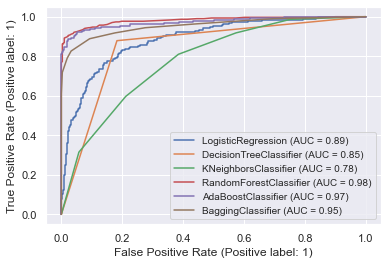

In [72]:
disp = plot_roc_curve(LR,x_test,y_test)

plot_roc_curve(DT ,x_test,y_test,ax=disp.ax_)   #ax_ - axes with confusion matrix

plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(RF,x_test,y_test, ax=disp.ax_)

plot_roc_curve(adaboost,x_test,y_test, ax=disp.ax_)

plot_roc_curve(BG,x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc = 'best')


plt.show()

Our Random Forest Classifier is performing extremely well out of all the model used so far.

Hyperparameter Tuning of Our Best Model

In [73]:
grid = {'n_estimators' : [10,20,30,40,50,60,70,80,90],
       'criterion' : ['gini','entropy'],
       'max_depth' : [1,2,3,4,5,6,7],
       "min_samples_split" : [1,2,3,4,5,6],
       "min_samples_leaf" : [1,2,3,4,5,6,7],
       'bootstrap':['True','False']}

In [74]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = RF, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [75]:
randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END bootstr

[CV] END bootstrap=False, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=3, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=3, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=3, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, min_sa

[CV] END bootstrap=False, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=

[CV] END bootstrap=True, criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, min_samples_l

[CV] END bootstrap=False, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=6, min

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90]},
                   random_state=42, verbose=2)

In [76]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': 'False'}

In [77]:
#Instantiating Our Final Model
model = RandomForestClassifier(n_estimators = 90,min_samples_split =6, min_samples_leaf = 7, max_depth = 7, criterion = 'entropy', bootstrap = False)

In [78]:
#Fitting our final Model
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       min_samples_leaf=7, min_samples_split=6,
                       n_estimators=90)

In [79]:
# Performing Evaluation metrics for our model
predmodel=model.predict(x_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predmodel),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predmodel), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predmodel))

Accuracy Score for Random Forest Classifier is : 92.71000000000001 % 

Confusion Matrix of Random Forest Classifier : 
 [[299  13]
 [ 32 273]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       312
           1       0.95      0.90      0.92       305

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

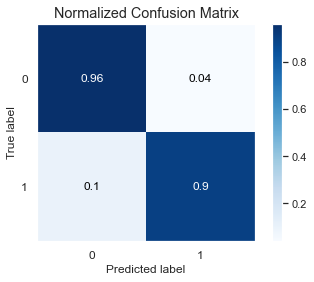

In [80]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predmodel, normalize=True)

Saving our final model

In [81]:
joblib.dump(model,"HRAttritionAnalysis.pkl")

['HRAttritionAnalysis.pkl']

Loading our Saved model

In [82]:
model = joblib.load("HRAttritionAnalysis.pkl")

In [83]:
#predicting test data using loaded model
prediction = model.predict(x_test)
prediction

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [84]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

,Predicted,Actual
0,1,1
1,0,0
2,0,1
3,0,0
4,1,0
...,...,...
612,1,0
613,1,0
614,0,1
615,1,0


In [85]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)